- Ganesh R
- 212222240029
- AIML



In [ ]:
import torch
import torch.nn as nn  # Neural network module
import numpy as np
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline

In [ ]:
X = torch.linspace(1,70,70).reshape(-1,1)

In [ ]:
torch.manual_seed(71)
e = torch.randint(-8,9,(70,1),dtype=torch.float)

In [ ]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


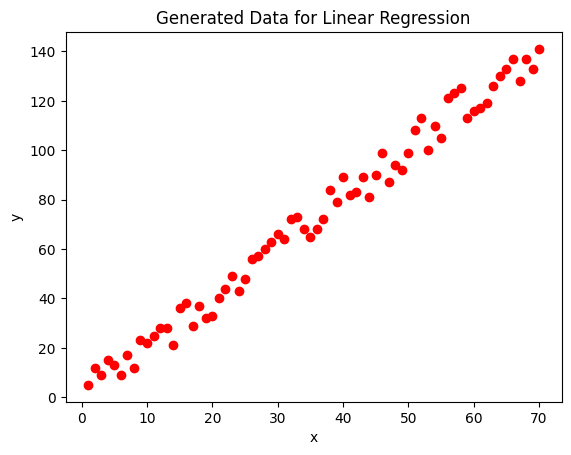

In [ ]:
plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

- Ganesh R
- 212222240029
- AIML

In [ ]:
# Setting a manual seed for reproducibility
torch.manual_seed(59)

# Defining the model class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [ ]:
# Creating an instance of the model
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [ ]:
loss_function = nn.MSELoss()  # Mean Squared Error (MSE) loss

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # Stochastic Gradient Descent


In [ ]:
epochs = 100  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')


epoch:  1  loss: 23.69770622  weight: 1.98956645  bias: 1.04305029
epoch:  2  loss: 23.69768333  weight: 1.98956537  bias: 1.04310143
epoch:  3  loss: 23.69766045  weight: 1.98956430  bias: 1.04315257
epoch:  4  loss: 23.69762611  weight: 1.98956311  bias: 1.04320371
epoch:  5  loss: 23.69760704  weight: 1.98956203  bias: 1.04325485
epoch:  6  loss: 23.69758034  weight: 1.98956096  bias: 1.04330599
epoch:  7  loss: 23.69755363  weight: 1.98955989  bias: 1.04335713
epoch:  8  loss: 23.69752502  weight: 1.98955882  bias: 1.04340827
epoch:  9  loss: 23.69750023  weight: 1.98955774  bias: 1.04345942
epoch: 10  loss: 23.69747543  weight: 1.98955667  bias: 1.04351056
epoch: 11  loss: 23.69743919  weight: 1.98955548  bias: 1.04356170
epoch: 12  loss: 23.69742012  weight: 1.98955441  bias: 1.04361284
epoch: 13  loss: 23.69739151  weight: 1.98955333  bias: 1.04366398
epoch: 14  loss: 23.69737053  weight: 1.98955226  bias: 1.04371512
epoch: 15  loss: 23.69734192  weight: 1.98955119  bias: 1.0437

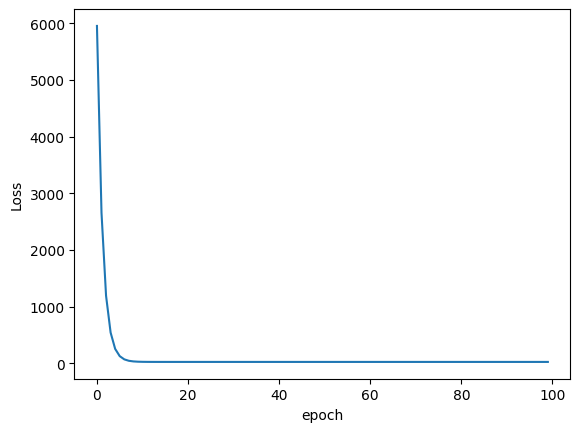

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [ ]:
# Automatically determine x-range
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1


In [ ]:
# Print weight, bias, and x/y values
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.98945880, Final Bias: 1.04810512
X range: [ 1. 70.]
Predicted Y values: [  3.0375638 140.31023  ]


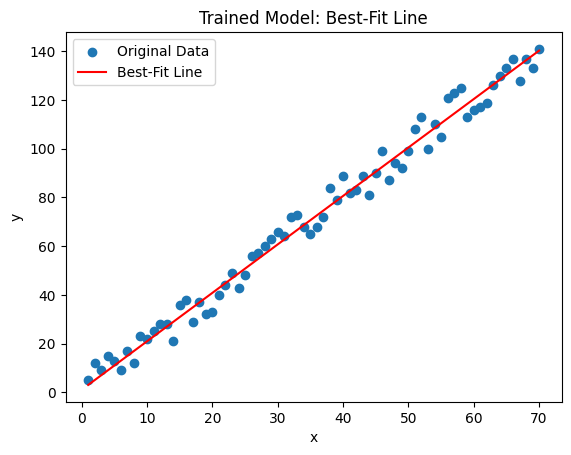

In [ ]:
# Plot original data and best-fit line
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(),"Ganesh_exp1.pt")